# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

Durante a simulação é aberto um ambiente gráfico que apresenta um desenhos de várias ruas que se cruzam nos diversos quarteirões, conforme imagem abaixo. Neste ambiente são mostrados veículos de diversas cores que se movimentam aleatoriamente (seguem em frente, viram a esquerda ou a direita ou ficam parados) conforme a sinalização de trânsito. A sinalização é representada por: uma linha vermelha no final da rua em cada cruzamento indicando o sinal vermelho, já o sinal verde é indicado quando essa linha vermelha desaparece.

O Smartcab é representado por um carro branco, que inicia aleatoriamente em alguma rua. Durante a simulação realizada o smartcab ficou paradado. Cada simulação é uma tentativa do Smartcab chegar ao destino, segundo as lei de trânsito e de forma otimizada. Na simulação realizada foram realizadas 124 tentativas para fazer o Smartcab chegar ao destino. Como o Smartcab não se movimentou, em nenhuma das 124 rodadas o smartcab conseguiu alcançar o seu objetivo. Para cada nova tentativa, o Smartcab é posicionado aleatoriamente em uma posição diferente.

O agente recebe uma recompensa nas seguintes situações:

- pára o Smartcab no sinal vermelho;
- pára o Smartcab no sinal verde quando há tráfego oposto.

O agente perde uma recompensa (recompensa negativa) nas seguintes situações:

- pára o Smartcab no sinal verde quando não há tráfego oposto: perde recompensa;
- segue o Smartcab no sinal vermelho quando há tráfego oposto.

![Imagem](windows.png "Janela do simulador")



### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- _agent.py_: 
    - learning: se atribuído TRUE força o agente usar Q-learning, onde epsilon - valor contínuo para o fator de exploração, o padrão é 1; e alpha - valor contínuo para a taxa de aprendizado, o padrão é 0.5
    - enforce_deadline: se atribuído TRUE força o uso de uma métrica de deadline
    - grid_size: define o número de interseções (colunas, linhas), o padrão é (8, 6)
- _environment.py_: é chamada a função 'act(self, agent, action)', que calcula a recompensa conforme a lei de trânsito.
- _simulator.py_: a função 'render_text()' mostra os dados da simulação no terminal (prompt), enquanto que a função 'reder()' mostra os dados da simulação no seu próprio ambiente gráfico, ou seja, na tela da simulação.
- _planner.py_: a função 'next_waypoint()' irá considerar primeiro as direções Leste-Oeste e depois Norte-Sul.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


<IPython.core.display.Javascript object>


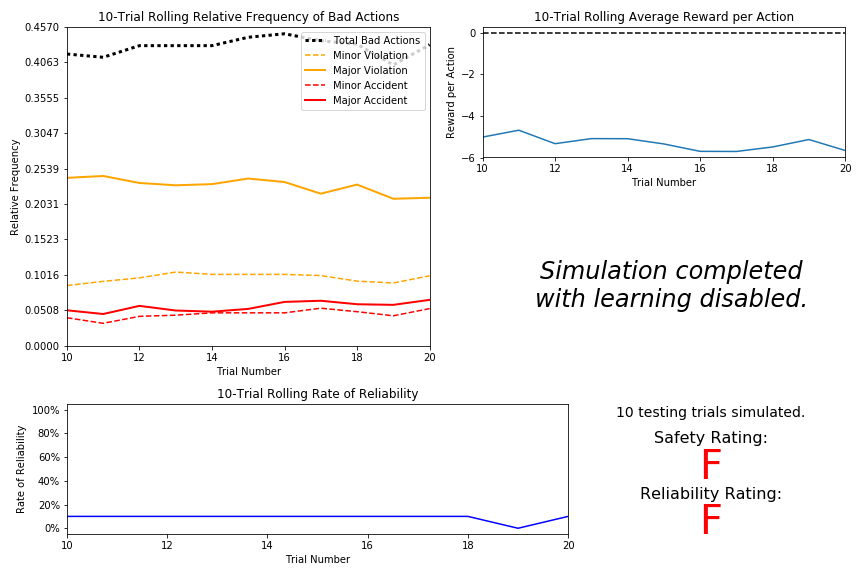

In [68]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

Nessa simulação o agente usou 100% de aleatoriedade para realizar os movimentos do Smarthcab, ou seja, o Smartcab é dirigido às cegas, sem obdiência as leis de trânsito que rege o ambiente de simulação. Logo:

- O gráfico "Trial Rolling Relative Frequence of Bad Actions" mostra que nas tentativas 10, 12, 14, 16, 18 e 20 das decisões tomadas pelo agente, 43%, 38%, 37%, 35%, 36% e 36%, respectivamente, foram ruins. Ocorrendo mais violações das lei graves (em média 23%) do que acidentes (em média 5%). Isso se explica pelo fato do ambiente ser formado por inúmeros cruzamentos sinalizados. Em cada desses cruzamentos a decisão aleatoria do agente terá a probabilidade de 50% de chance de sucesso e 50% de erro. Já o número de acidentes vai depender do movimento aleatório do agente coincidir para a direção que atinja outro carro vindo em sentido oposto, neste caso a probabilidade será de 25% de chance de acidente (parado, esquerda, direita, frente).


- O gráfico "Trial Rolling Rate of Reliability" mostra que faz um certo sentido a taxa de confiabilidade neste cenário. Pois a medida que o número de tentativas aumenta a taxa continua praticamente constante, por volta de 1%. Isso mostra que o agente sempre mantém um acerto mínimo de açoes tomadas (apensar de não ser o suficiente) dentro do espaço de escolhas aleatórias. Isso não impede que, neste caso, em um número indefinido de tentativas o agente possa alcançar uma taxa de confiabilidade próxima de 100%, apesar da baixíssima probalidade disso acontecer.


- O gráfico "Trial Rolling Average Reward per Action" mostra que o agente recebeu, em média, muitas penalizações (recompensa negativa) em suas ações, ficando num valor aproximado de -5 nas 20 tentativas. Esses valores mostram que o agente foi penalizado severamente em todas as tentativas e nas ações, visto que a penalidade, quase não variu de valor e nenhuma vez seu valor foi positivo.


- Em todos os gráficos praticamente as curvas sofreram pouco ou quase nada de variação ao se incrementar o número de tentativas. Isso comprova que os movimentos aleatórios no universo das oportunidades de movimento, neste cenário, não fazem nenhum sentido e se torna inócuo até para extrair alguma informação relevante na análise, de tal forma que seus resultados são até piores que se deixasse o agente sem movimento ou escolhendo ir somente numa direção. Por outro lado, o fator aleatoriedade permite o agente explorar o ambiente o máximo possível que o torna propício a aprender a tomar melhores ações em cada estado.


- Este SmartCab não pode ser considerado nem seguro e nem confiável para seus passageiros porque não há aprendizado do agente, porque todo movimento é aleatório e não há ganho de informação ao Smartcab, como mostrado nos resultados dos gráficos.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

As seguintes features descritas abaixo são relevantes para segurança e eficiência:

- 'waypoin': sem essa feature o agente não saberá a direção que deverá tomar para alcançar o destino e também ela ajuda o agente saber se está na direção (caminho) correta.
- 'inputs(light,left,right,oncoming)' : sem essa feature o agente não terá dados suficientes para tomar uma ação segura e eficiente, muito menos seguirá as leis de trânsito exigidas no ambinente simulado.
    - light: com essa feature o agente sabe quando, em um cruzamento, o sinal está vermelho ou não, ou seja, se deve permancer parado ou seguir.
    - left: com essa feature o agente sabe quando, em um cruzamento, qual será a ação (ficar parado, seguir ou virar à esquerda ou à direita) de um veículo à esquerda. Isso impede, por exemplo, que o Smartcab siga num sinal vermelho, quando há um veículo a sua esquerda e esse veículo está em movimento, pois senão um acidente ocorreria.
    - oncoming: com essa feature o agente sabe quando, em um cruzamento, qual será a ação (ficar parado, seguir ou virar à esquerda ou à direita) de um veículo vindo em direção oposta. Com esse conhecimento, evita que o agente, por exemplo, em um cruzamento num sinal verde, vire a esquerda quando um carro em direção oposta segue em frente, pois causaria um acidente.

As features abaixo não podem ser consideradas relevantes para segurança e eficiência:

- 'deadline': não é relevante porque seu valor não trás ganho de informação ao aprendizado do agente em termos de segurança principalmente, pois essa informação não ajudaria na decisão do agente de tomar a melhor ação em cruzamento e também prejudicaria o aprendizado do agente de forma geral, pois aumentaria bastante o número de estados que ele precisaria aprender.  
- right: com essa feature o agente sabe quando, em um cruzamento, qual será a ação (ficar parado, seguir ou virar à esquerda ou à direita) de um veículo à direita. Entretanto, essa informação não trás ganho ao aprendizado do agente. Se o sinal está vermelho no cruzamento, o Smartcab não deve seguir em frente e nem à esquerda, por lei, ou se quisesse seguir à direita não dependeria da existência de um carro à direita, pois o Smartcab entraria na faixa oposta que não se cruzam. Se o sinal está verde, a preferência de passagem é do Smartcab e caso queira virar à esquerda e vier um carro à direita seguindo em frente a culpa do acidente será do carro vindo à direita. 


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

*Answer:**

De acordo com as features escolhidas na **Questão 4**, que foram 'waypoin','light','left','oncoming', o estado do Smartcab pode ser definido como ('waypoin','light','left','oncoming'), onde :
- 'waypoint' pode ter os valores *left, right, forward*;
- 'left, e 'oncoming' podem ter os valores *none, left, right, forward* ;
- 'light' pode ser os valores *Red, Green*;

Dessa forma o número de estados possíveis do smartcab será: 3 X 4 X 4 X 2 = 96. 

Logo, a partir do conhecimento atual do ambiente de simulação faz-se necessário o agente aprender tomar decisões (tomar a ação necessária) em 96 estados possíveis, de tal forma que o Smartcab alcance seu destino. 



### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

<IPython.core.display.Javascript object>


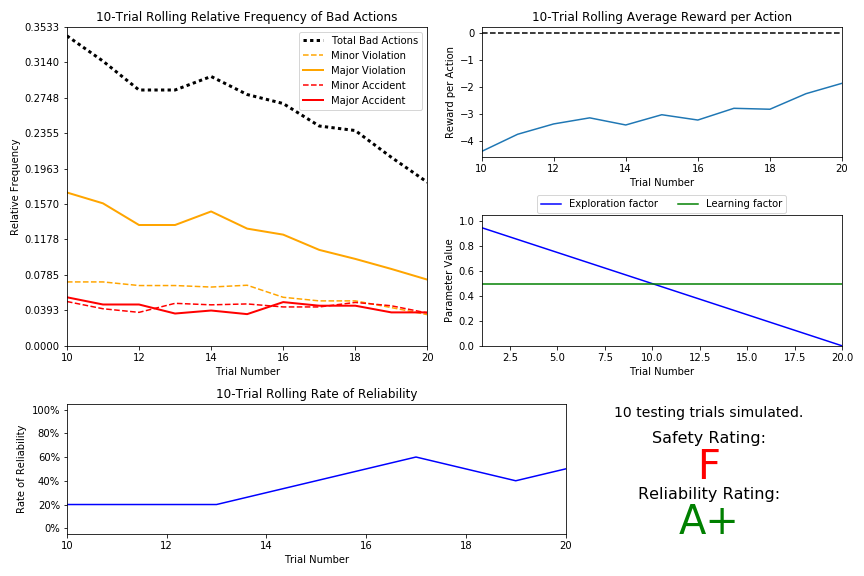

In [69]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Para essa simulação com aprendizado o agente usou a função de declínio $ \epsilon_{t+1} = \epsilon_{t} - 0.05$, para o número de tentativas $t$. 

- Ambos casos obtiveram similares curvas de "Bad Actions" e de "Reward per Action", apesar de os resultados com o aprendizado serem melhores, ou seja, com o aprendizado o agente violou um pouco menos as leis de trânsito e causou menos acidentes.
- O agente treinou em 20 tentativas. Esse número combina com o valor dados de epsilon e de seu decréscimo que após 20 tentativas o valor de _e_ é zerado. Quando esse valor é atingido o agente passa para a fase de teste.
- Sim, foi corretamente representada no painel de parâmetro, pois mostra uma linha reta decrescente conforme aumento o número de tentativas.
- Conforme os gráficos de resultado, à medida que as tantativas de treino aumentam o número de ações ruins decresce, por exemplo, na tentativa 10 o número de ações ruins está por volta de 33% e em 20 está um pouco acima de 19%. Como consequência disso a média de recomensa aumenta, como pode ser visto no gráfico de Média de Recompensa por Ação.   
- De forma geral, com o número de tentativas a percentagem de ações erradas caíram, as recompensas aumentaram e a taxa de confiaça sofreu um leve aumento. Já o resultado anterior (sem aprendidado) do smartcab apresentam-se tais valores de forma praticamente constante, em todas as tentativas. Além disso, o agente conseguiu A+ de taxa de confiabilidade, mostrando que ele aprendeu e conseguiu alcançar o destino 10% das vezes, apesar de violar as leis de trânsito e causar acidentes bem graves.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

1. Decay: epsilon=epsilon-0.05; e=1.0; a=0.5; t=0,05; ntest=10


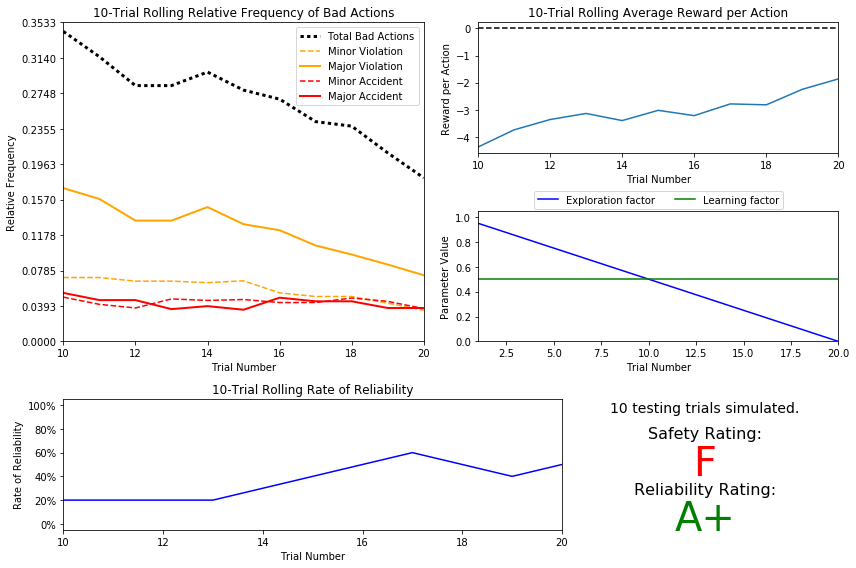

In [73]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("1. Decay: epsilon=epsilon-0.05; e=1.0; a=0.5; t=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-1.csv')

2. Decay: epsilon=alpha**t; e=1.0; a=0.5; to=0,05; ntest=10


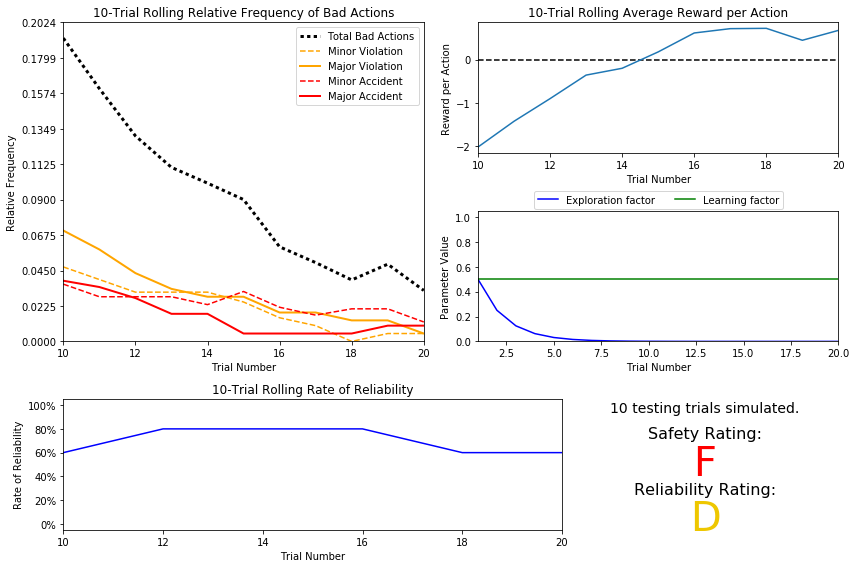

In [74]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("2. Decay: epsilon=alpha**t; e=1.0; a=0.5; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-2.csv')

3. Decay: epsilon=alpha**t; e=1.0; a=0.99; to=0,05; ntest=10


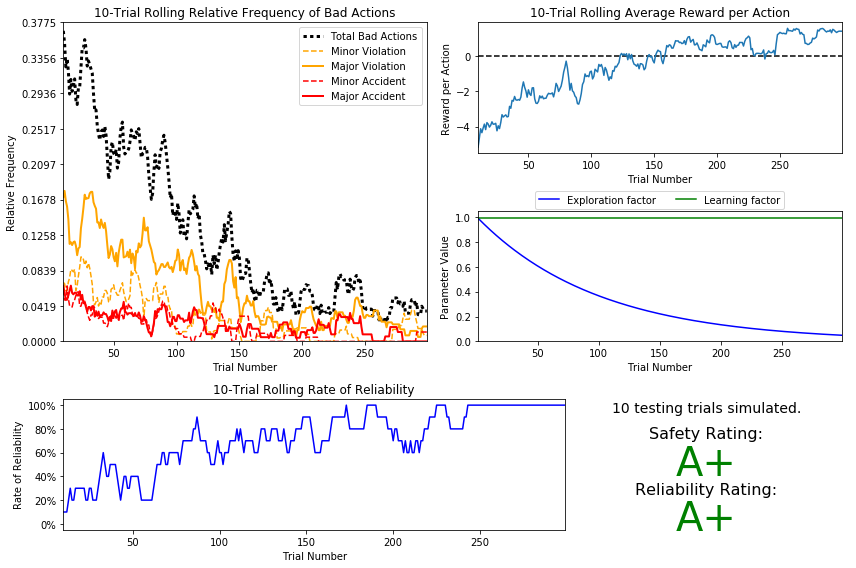

In [76]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("3. Decay: epsilon=alpha**t; e=1.0; a=0.99; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-3.csv')

4. Decay: epsilon=1.0/(t**2); e=1.0; a=0.5; to=0,05; ntest=10


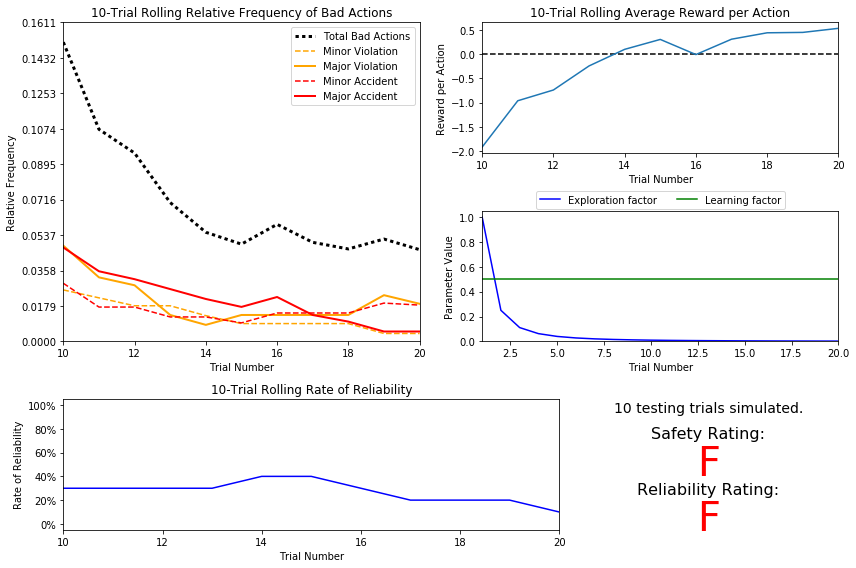

In [77]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("4. Decay: epsilon=1.0/(t**2); e=1.0; a=0.5; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-4.csv')

5. Decay: epsilon=1.0/(t**2); e=1.0; a=0.99; to=0,05; ntest=10


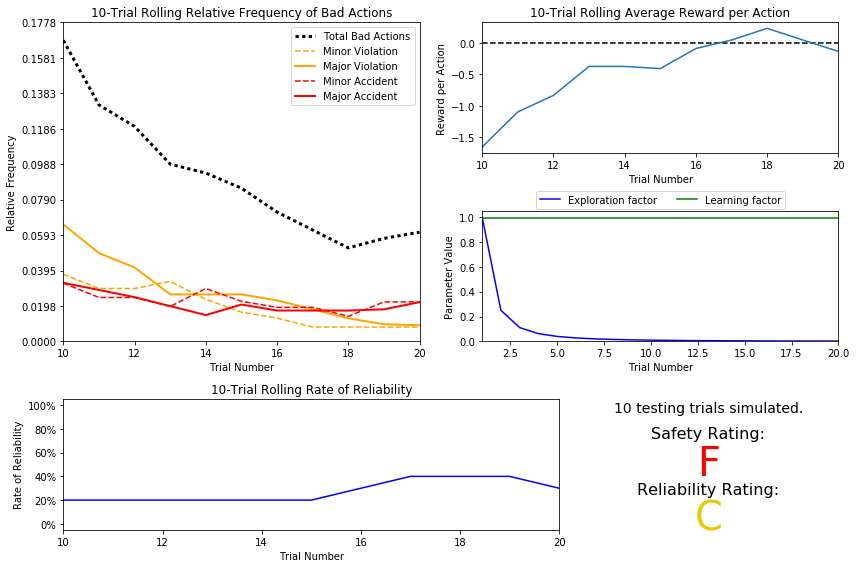

In [78]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("5. Decay: epsilon=1.0/(t**2); e=1.0; a=0.99; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-5.csv')

6. Decay: epsilon=1.0/(t**2); e=1.0; a=0.99; to=0,0001; ntest=10


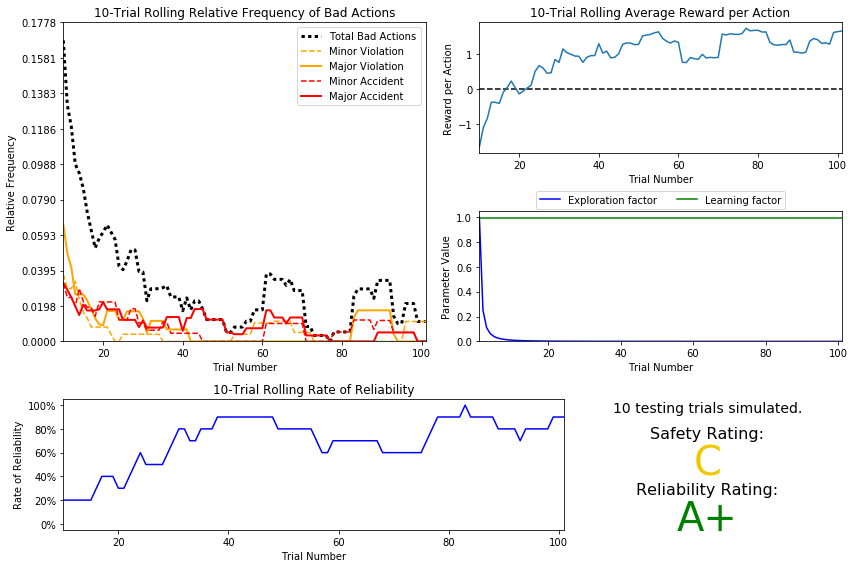

In [79]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("6. Decay: epsilon=1.0/(t**2); e=1.0; a=0.99; to=0,0001; ntest=10")
vs.plot_trials('sim_improved-learning-6.csv')

7. Decay: epsilon=1.0/(math.e**(alpha*t)); e=1.0; a=0.5; to=0,05; ntest=10


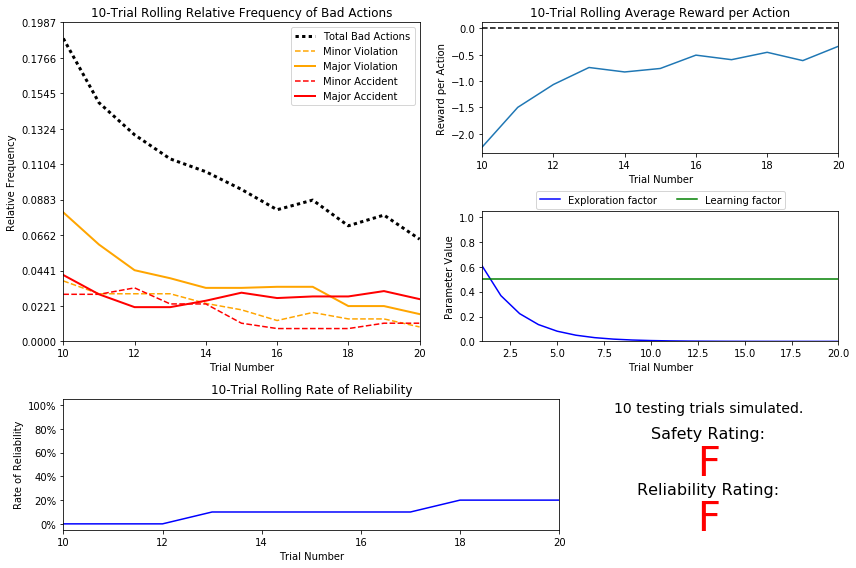

In [80]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("7. Decay: epsilon=1.0/(math.e**(alpha*t)); e=1.0; a=0.5; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-7.csv')

8. Decay: epsilon=1.0/(math.e**(alpha*t)); e=1.0; a=0.99; to=0,05; ntest=10


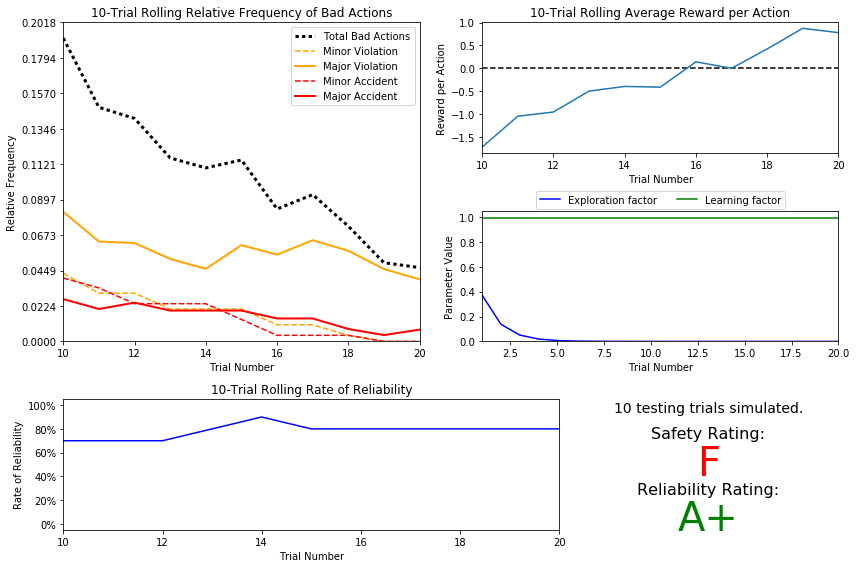

In [81]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("8. Decay: epsilon=1.0/(math.e**(alpha*t)); e=1.0; a=0.99; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-8.csv')

9. Decay: epsilon=1.0/(math.e**(alpha*t)); e=1.0; a=0.1; to=0,0001; ntest=10


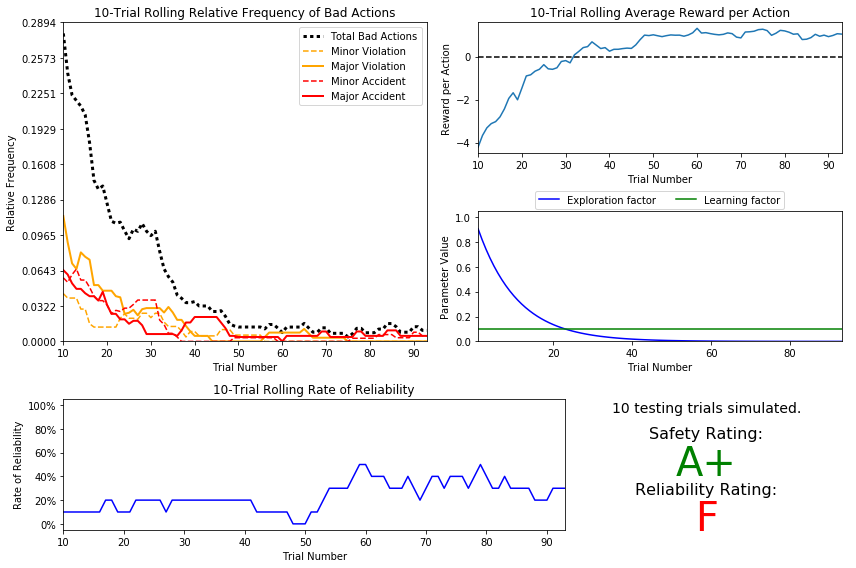

In [83]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("9. Decay: epsilon=1.0/(math.e**(alpha*t)); e=1.0; a=0.1; to=0,0001; ntest=10")
vs.plot_trials('sim_improved-learning-9.csv')

10. Decay: epsilon=math.cos(alpha*t); e=1.0; a=0.5; to=0,05; ntest=10


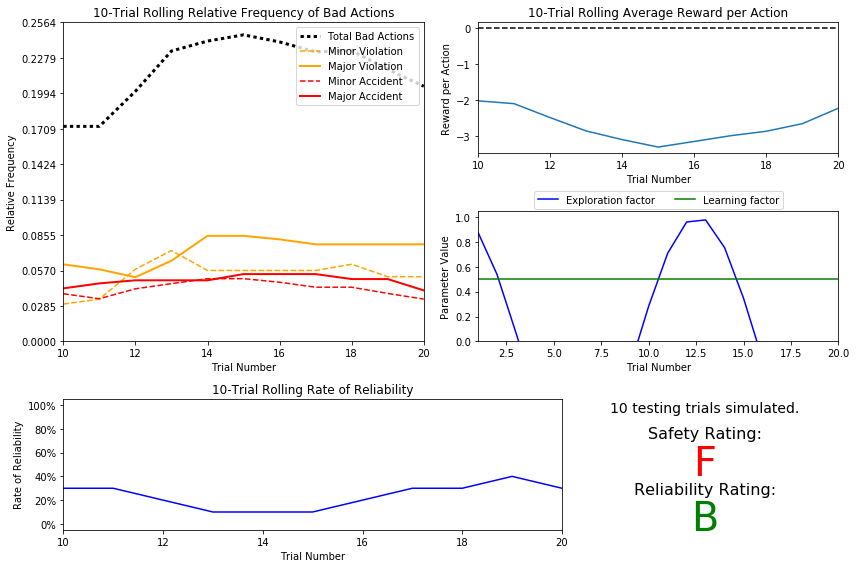

In [84]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("10. Decay: epsilon=math.cos(alpha*t); e=1.0; a=0.5; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-10.csv')

11. Decay: epsilon=math.cos(alpha*t); e=1.0; a=0.99; to=0,05; ntest=10


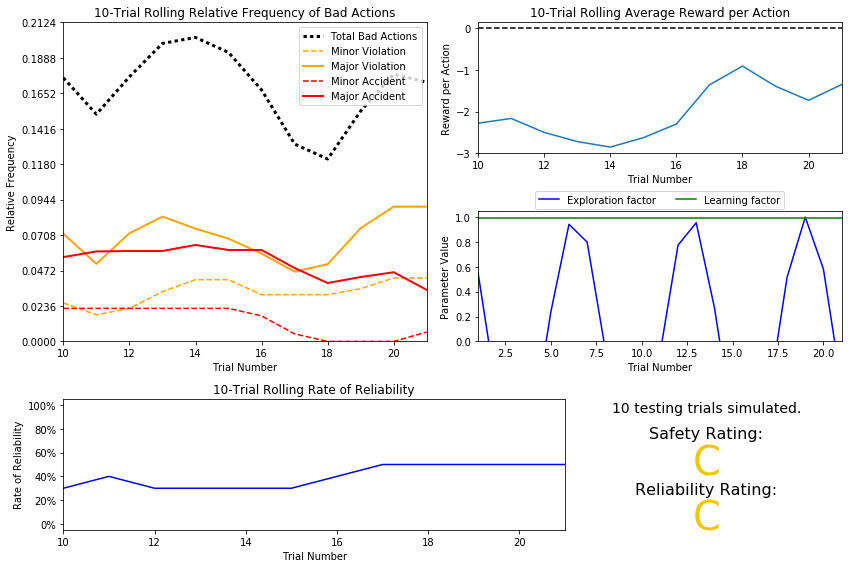

In [85]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("11. Decay: epsilon=math.cos(alpha*t); e=1.0; a=0.99; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-11.csv')

12. Decay: epsilon=math.cos(alpha*t); e=1.0; a=0.02; to=0,05; ntest=10


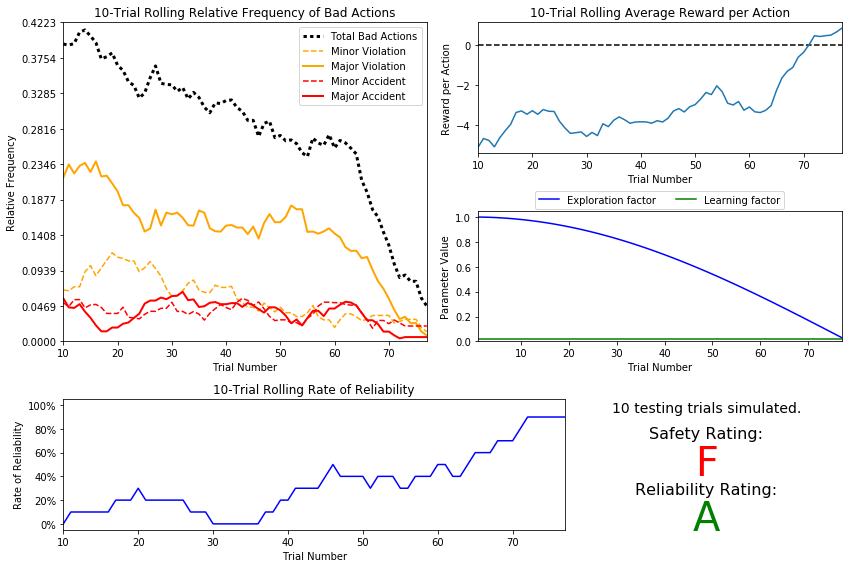

In [86]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("12. Decay: epsilon=math.cos(alpha*t); e=1.0; a=0.02; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-12.csv')

13. Decay: epsilon=math.cos(alpha*t); e=1.0; a=0.01; to=0,05; ntest=10


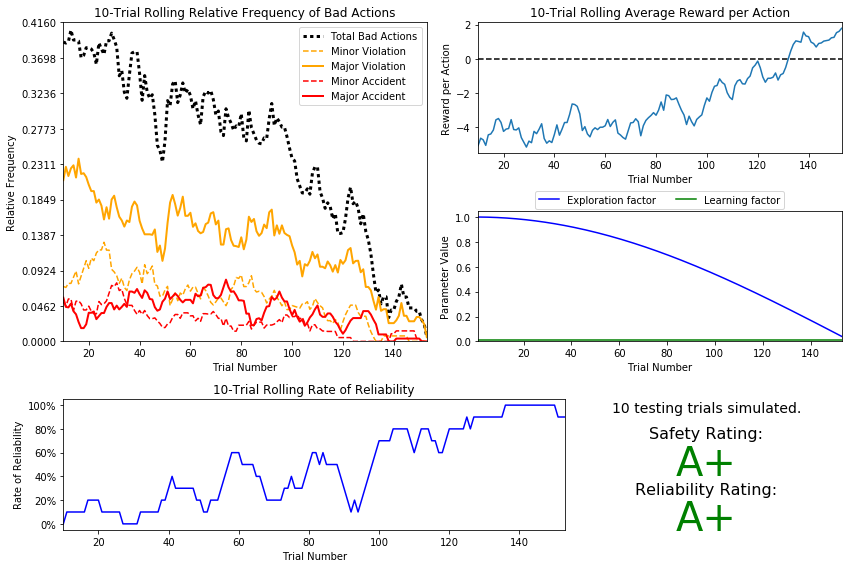

In [87]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("13. Decay: epsilon=math.cos(alpha*t); e=1.0; a=0.01; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-13.csv')

14. Decay: epsilon=abs(math.cos(alpha*t)); e=1.0; a=0.5; to=0,05; ntest=10


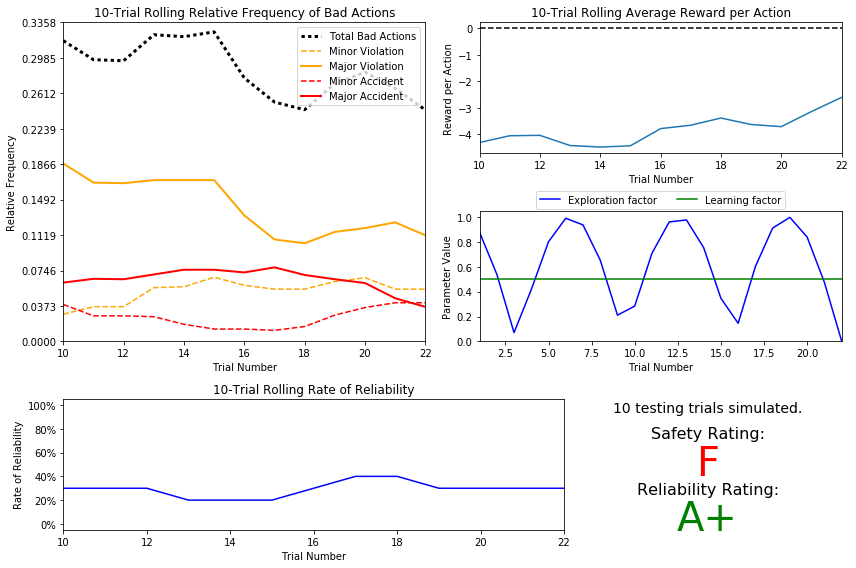

In [88]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("14. Decay: epsilon=abs(math.cos(alpha*t)); e=1.0; a=0.5; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-14.csv')

15. Decay: epsilon=abs(math.cos(alpha*t)); e=1.0; a=0.1; to=0,05; ntest=10


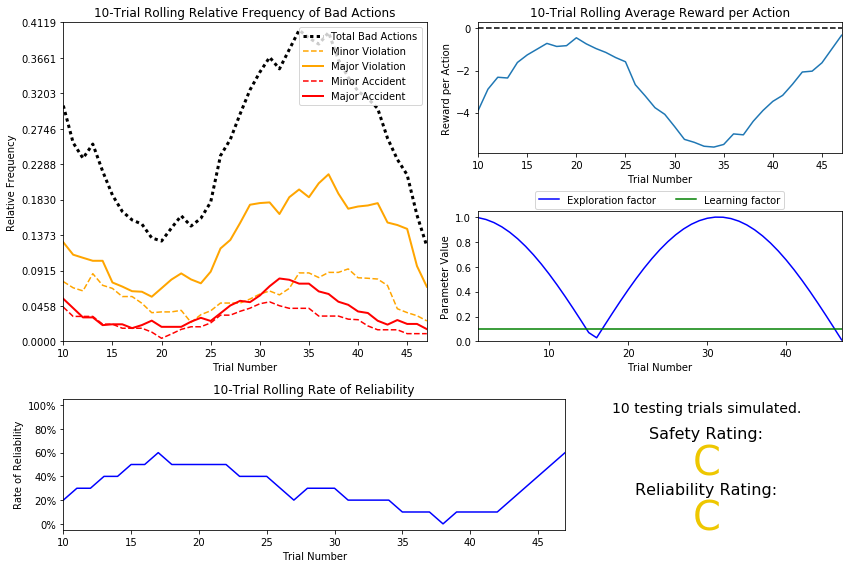

In [89]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("15. Decay: epsilon=abs(math.cos(alpha*t)); e=1.0; a=0.1; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-15.csv')

16. Decay: epsilon=abs(math.cos(alpha*t)); e=1.0; a=0.01; to=0,05; ntest=10


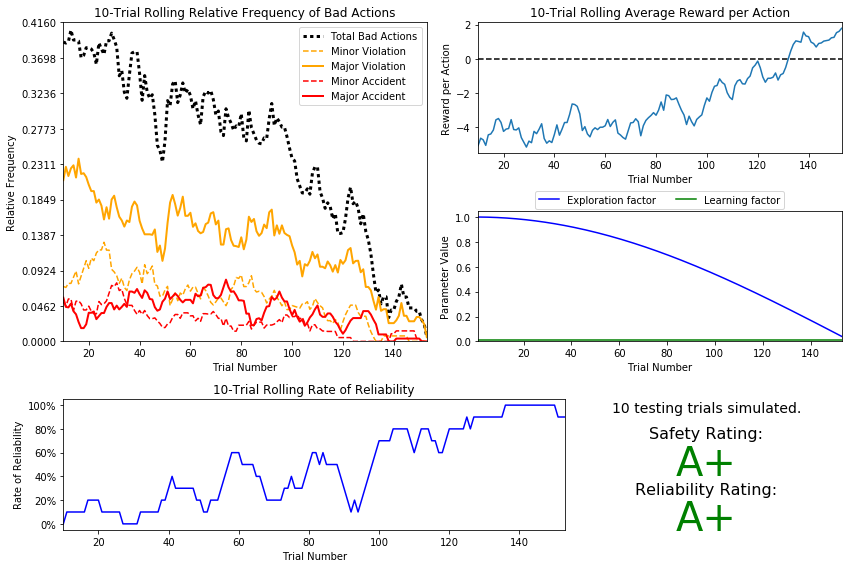

In [90]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("16. Decay: epsilon=abs(math.cos(alpha*t)); e=1.0; a=0.01; to=0,05; ntest=10")
vs.plot_trials('sim_improved-learning-16.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

Foram realizadas diversas rodadas de simulação com a variação dos parâmetros: Alpha, Tolerance e Decaying Functions. Foram um total de 16 rodadas e os resultados foram resumidos na seguinte tabela:

|  ID | N_TEST  | EPSILON  | ALPHA  | TOLERANCE  |  DECAYING FUNCTION | TRIALS  | SAFETY  | RELIABILITY  |
|---|---|---|---|---|---|---|---|---|
| 1  | 10  | 1  | 0.5  | 0.05  | $\epsilon_{t+1} = \epsilon_{t} - 0.05$  | 20  | F  | A+  |
| 2  | 10  | 1  | 0.5  | 0.05  | $\epsilon = a^t$  | 20  | F  | D  |
| **3**  | **10**  | **1**  | **0.99**  | **0.05**  | $\epsilon = a^t$  | **299**  | **A+**  | **A+**  |
| 4  | 10  | 1  | 0.5  | 0.05  | $\epsilon = \frac{1}{t^2}$  | 20  | F  | F  |
| 5  | 10  | 1  | 0.99  | 0.05  | $\epsilon = \frac{1}{t^2}$  | 20  | F  | C  |
| 6  | 10  | 1  | 0.99  | 0.0001  | $\epsilon = \frac{1}{t^2}$  | 101  | C  | A+  |
| 7  | 10  | 1  | 0.5  | 0.05  | $\epsilon = e^{-at}$  | 20  | F  | F  |
| 8  | 10  | 1  | 0.99  | 0.05  | $\epsilon = e^{-at}$  | 20  | F  | A+  |
| 9  | 10  | 1  | 0.1  | 0.0001  | $\epsilon = e^{-at}$  | 93  | A+  | F  |
| 10  | 10  | 1  | 0.5  | 0.05  | $\epsilon = \cos(at)$  | 20  | F  | B  |
| 11  | 10  | 1  | 0.99  | 0.05  | $\epsilon = \cos(at)$  | 21  | C  | C  |
| 12  | 10  | 1  | 0.02  | 0.05  | $\epsilon = \cos(at)$  | 77  | F  | A  |
| **13**  | **10**  | **1**  | **0.01**  | **0.05**  | **$\epsilon = \cos(at)$**  | **153**  | **A+**  | **A+**  |
| 14  | 10  | 1  | 0.5  | 0.05  | $abs(\epsilon = \cos(at))$  | 22  | F  | A+  |
| 15  | 10  | 1  | 0.1  | 0.05  | $abs(\epsilon = \cos(at))$  | 47  | C  | C  |
| **16**  | **10**  | **1**  | **0.01**  | **0.05**  | **$abs(\epsilon = \cos(at))$**  | **153**  | **A+**  | **A+**  | |

Os melhores resultados foram obtidos nas rodadas *3*, *13*, e *16*. Esses resultados foram obtidos, respectivamente com as Decaying Functions $\epsilon = a^t$, $\epsilon = \cos(at)$ e $abs(\epsilon = \cos(at))$ e com os respectivamente 299, 153 e 153 de número de tentativas. Assim, foi escolhido a rodada **13** como o melhor resultado (arquivos sim_improved-learning-13.csv e sim_improved-learning-13.txt) da qual se basearão as respotas abaixo. 

1) Foi usada a Decaying Function  $\epsilon = \cos(at)$. 

2) Foram necessários 153 tentativas na fase de teste.

3) Foram usados 1 e 0,01 para *Epsilon* e *Alpha*, respectivamente. A função $cos(at)$ decresce e cresce rapidamente, em poucas tentativas o valor essa função já gerava valoress negativos, por isso foi escolhido usar o valor de 1 para Epsilon (a maior possível) e 0,01 para Alpha, para tentar diminuir essa taxa de decrescimento (ou crescimento) garantindo um treino maior ao agente.

4) Utilizou-se outra Dacaying Function, alterou-se os parâmetros Alpha e Tolerance de forma que o tamanho do treino aumentou (maior número de tentativas) e o agente conseguiu aprender melhor tomar a ação certa em todos os estados. 

5) Sim, pois ele obteve A+ para segurança e A+ para confiabilidade. Como se pode ver nos gráficos, a partir da tentativa 135 o agente praticamente só recebeu recompensas, praticamente não fez uma ação ruim e a taxa de confiabilidade se aproximava de 100%.

6) Sim. Mas como melhoria futura poderia-se tentar obter os mesmos resultados com uma menor quantidade de tentativas.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Como politica ideal poder-se-ia dar como exemplo para o estado (waypoin,light,left,oncoming):

- Se estado = ('forward','red','none','none') então ação='none'
- Se estado = ('left','red','none','none') então ação='none'
- Se estado = ('right','red','none','none') então ação='none'

Em todos os estados a política foi correta. Entretanto, foram observados os seguintes estados onde a política não tomada foi a ótima (ideal):

left_green_None_right
 -- forward : 0.00
 -- right : 0.06
 -- None : -0.10
 -- left : -0.42

left_green_right_left
 -- forward : 0.03
 -- right : 0.01
 -- None : 0.00
 -- left : 0.03

forward_green_None_left
 -- forward : 0.53
 -- right : 0.01
 -- None : 0.12
 -- left : 0.09

Em todos esses casos um acidente seria causado não pelo Smartcab mas pelos outros carros que não obedeceriam a lei de trânsito. Dessa forma, a politica ideal deveria ser defensiva e nestes casos mesmo com sinal verde para o Smartcab, este deveria ficar parado. Entretanto, este ambiente de não permite que o agente fiquem parados quando o sinal está verde, quando isso acontece é recebido uma penalidade leve. Logo, neste cenário não faz sentido o agente tomar uma atitude defensiva nas suas ações.

O seguinte estado mostra o exemplo de uma política correta:

forward_green_None_right
 -- forward : 0.11
 -- right : 0.01
 -- None : -0.11
 -- left : -0.78
 
Neste caso, o Smartcab seguiu em frente pois o agente tomou essa decisão baseado no valor maior dentre os valores das ações possíveis (forward=0.11). Além disso, não tinha nenhum carro à esquerda e o carro que vinha em sentido contrário iria para a direita.    


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

As duas características são: 
- A posição (X,Y) em que se encontra o Smartcab. Na simulação o Smrtcab não recebe de nenhum sensor essa informação de localização. 
- A não fixação do destino do Smartcab, pois a cada nova tentativa o destino muda e não há como definir uma estratégia se o destino não foi previamente analisado, estudado ou aprendido.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.